<a href="https://colab.research.google.com/github/utkarsh-284/Cyclistic-Case-Study/blob/main/Cyclistic_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Cyclistic Case Study</h1>

# Importing Libraries

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Use the conflicted package to manage conflicts
library(conflicted)

In [3]:
# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")
conflict_prefer("select", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.
[conflicted] Will prefer dplyr::select over any other package.


# Loading and Exploring Data

In [4]:
# Loading Data
Q1_2019 <- read.csv("/content/Divvy_Trips_2019_Q1.csv")
Q1_2020 <- read.csv("/content/Divvy_Trips_2020_Q1.csv")

In [5]:
colnames(Q1_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [6]:
colnames(Q1_2020)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

We can see that there are many coloumns which have different names but contains same information. To make data consistent for both the years, we'll change the name of columns for 2019's data according to 2020's.

In [7]:
# Renaming column of 2019 data to make it consistent with that of 2020
(Q1_2019<- rename(Q1_2019,
                 ride_id = trip_id,
                 rideable_type = bikeid,
                 started_at = start_time,
                 ended_at = end_time,
                 start_station_name = from_station_name,
                 start_station_id = from_station_id,
                 end_station_name = to_station_name,
                 end_station_id = to_station_id,
                 member_casual = usertype))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
21742443,2019-01-01 0.04.37,2019-01-01 0.11.07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 0.08.13,2019-01-01 0.15.34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 0.13.23,2019-01-01 0.27.12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 0.13.45,2019-01-01 0.43.28,252,"1,783.00",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 0.14.52,2019-01-01 0.20.56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 0.15.33,2019-01-01 0.19.09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 0.16.06,2019-01-01 0.19.03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 0.18.41,2019-01-01 0.20.21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 0.18.43,2019-01-01 0.47.30,6205,"1,727.00",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


**Inspecting Dataframes:**

In [8]:
str(Q1_2019)

'data.frame':	365069 obs. of  12 variables:
 $ ride_id           : int  21742443 21742444 21742445 21742446 21742447 21742448 21742449 21742450 21742451 21742452 ...
 $ started_at        : chr  "2019-01-01 0.04.37" "2019-01-01 0.08.13" "2019-01-01 0.13.23" "2019-01-01 0.13.45" ...
 $ ended_at          : chr  "2019-01-01 0.11.07" "2019-01-01 0.15.34" "2019-01-01 0.27.12" "2019-01-01 0.43.28" ...
 $ rideable_type     : int  2167 4386 1524 252 1170 2437 2708 2796 6205 3939 ...
 $ tripduration      : chr  "390" "441" "829" "1,783.00" ...
 $ start_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr  "Subscriber" 

In [9]:
str(Q1_2020)

'data.frame':	426887 obs. of  13 variables:
 $ ride_id           : chr  "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-01-21 20.06.59" "2020-01-30 14.22.39" "2020-01-09 19.29.26" "2020-01-06 16.17.07" ...
 $ ended_at          : chr  "2020-01-21 20.14.30" "2020-01-30 14.26.22" "2020-01-09 19.32.17" "2020-01-06 16.25.56" ...
 $ start_station_name: chr  "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : int  239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr  "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : int  326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num  42 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.6 -

Above results shows that there are various columns in both dataframes which are having conflicting object types.
They needs to be made similar to stack correctly.

In [10]:
# Convert ride_id and rideable_type to character
Q1_2019<- Q1_2019 %>%
  mutate(ride_id = as.character(ride_id),
    rideable_type = as.character(rideable_type))

**Combining both data and removing those observations which are not relevant:**

In [11]:
# Combining Both data into single dataset
all_trips<- bind_rows(Q1_2019, Q1_2020)

In [12]:
# Removing data which is not common and irrelevant
all_trips<- all_trips %>%
  select(-c(start_lat, start_lng, end_lat, end_lng, tripduration,
start_station_id, end_station_id, ride_id, rideable_type))

# Cleaning up Data and preparing for Analysis

In [13]:
colnames(all_trips)

[1] "started_at"         "ended_at"           "start_station_name"
[4] "end_station_name"   "member_casual"      "gender"            
[7] "birthyear"

In [14]:
nrow(all_trips)

[1] 791956

In [15]:
dim(all_trips)

[1] 791956      7

In [16]:
head(all_trips)

,started_at,ended_at,start_station_name,end_station_name,member_casual,gender,birthyear
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2019-01-01 0.04.37,2019-01-01 0.11.07,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
2,2019-01-01 0.08.13,2019-01-01 0.15.34,State St & Randolph St,Dearborn St & Van Buren St (*),Subscriber,Female,1990
3,2019-01-01 0.13.23,2019-01-01 0.27.12,Racine Ave & 18th St,Western Ave & Fillmore St (*),Subscriber,Female,1994
4,2019-01-01 0.13.45,2019-01-01 0.43.28,California Ave & Milwaukee Ave,Clark St & Elm St,Subscriber,Male,1993
5,2019-01-01 0.14.52,2019-01-01 0.20.56,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,Subscriber,Male,1994
6,2019-01-01 0.15.33,2019-01-01 0.19.09,LaSalle St & Washington St,Dearborn St & Monroe St,Subscriber,Female,1983


In [17]:
str(all_trips)

'data.frame':	791956 obs. of  7 variables:
 $ started_at        : chr  "2019-01-01 0.04.37" "2019-01-01 0.08.13" "2019-01-01 0.13.23" "2019-01-01 0.13.45" ...
 $ ended_at          : chr  "2019-01-01 0.11.07" "2019-01-01 0.15.34" "2019-01-01 0.27.12" "2019-01-01 0.43.28" ...
 $ start_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...
 $ gender            : chr  "Male" "Female" "Female" "Male" ...
 $ birthyear         : int  1989 1990 1994 1993 1994 1983 1984 1990 1995 1996 ...


Since `Member_casual` are given differtent names in both data, they needs to be assigned common name for future work.

In [18]:
# Reassign to the desired values
all_trips<- all_trips %>%
  mutate(member_casual = recode(member_casual,
                "Subscriber" = "member",
                "Customer" = "casual"))

In [19]:
table(all_trips$member_casual)


casual member 
 71643 720313 

In [20]:
# Check for missing values in each column
colSums(is.na(all_trips))

started_at           ended_at start_station_name   end_station_name 
                 0                  0                  0                  0 
     member_casual             gender          birthyear 
                 0             426887             444910

Abore result shows that threre are too many NA values under the columns `gender` and `birthyear`, this may be because we got data on these categories only in 2019. Thus we can not make any inference about the gender type or age of the rider. So we should drop these columns.

In [21]:
all_trips <- all_trips %>%
  select(-c(gender, birthyear))

## Formatting Date

We can see that the columns containing date and time information, are been comsidered as character. Let's convert them to date and time format:

In [22]:
all_trips$Date <- as.Date(all_trips$started_at)  # Default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$Date), "%m")  # Month
all_trips$day<- format(as.Date(all_trips$Date), "%d")  # Day
all_trips$year<- format(as.Date(all_trips$Date), "%y")  # Year
all_trips$day_of_week<- format(as.Date(all_trips$Date), "%A")  # Day of Week

In [23]:
# Convert started_at and ended_at to date-time format
all_trips$started_at <- as.POSIXct(all_trips$started_at,
format = "%Y-%m-%d %H.%M.%S")
all_trips$ended_at <- as.POSIXct(all_trips$ended_at,
format = "%Y-%m-%d %H.%M.%S")

In [24]:
# Adding the ride length of the ride (in seconds)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [25]:
# Converting ride_length from factor to numeric
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

## Removing unnecessary data & Checking for Outliers

Observing different observations and analysing different categories, it was observed that there are many observations showing `start_station_name` or `end_station_name` as "HQ QR", means that they are those rides which are taken from or to Headquaters, either for mentinance purpose or were straight from production facility. So they should be removed as they might give wrong interpretations.

Also there are few rids with negative or zero `ride_length`, which might be because of either technical issues or wrongly interpreted during data entry. Either way they may give the wrong interpretation of the data, so they too must be removed.

In [26]:
# Filter out rides starting at "HQ QR"
all_trips_v2 <- all_trips %>%
  filter(start_station_name != "HQ QR" | end_station_name != "HQ QR")

# Filter out rides with negative ride length
all_trips_v2 <- all_trips_v2 %>%
  filter(ride_length >= 0)

**Plotting Boxplot and Q-Q plot, to observe outliers if any:**

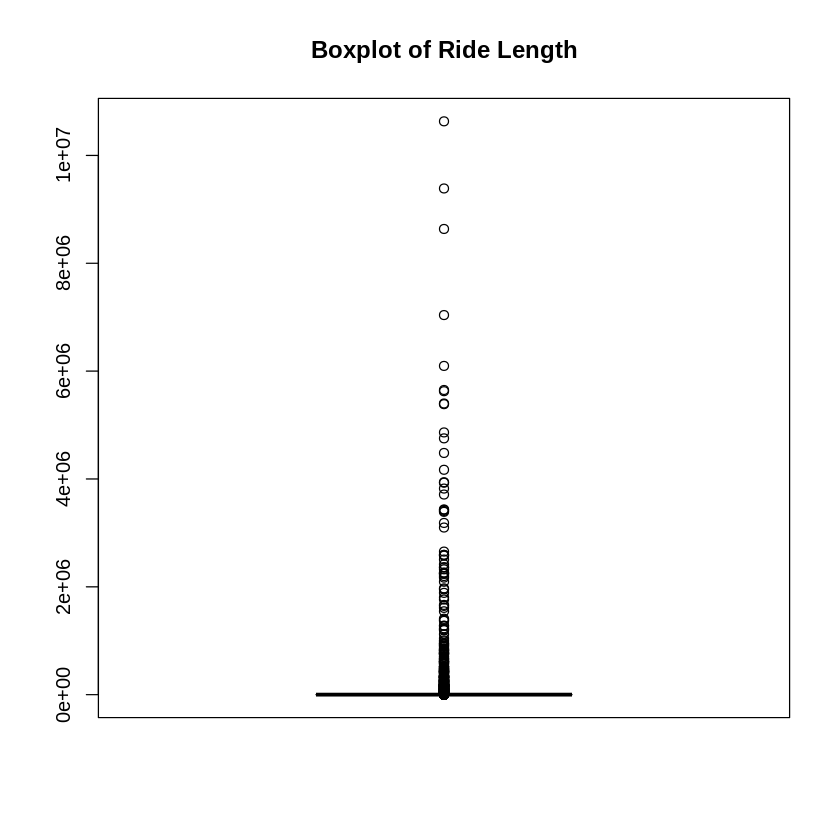

In [27]:
boxplot(all_trips_v2$ride_length, main="Boxplot of Ride Length")

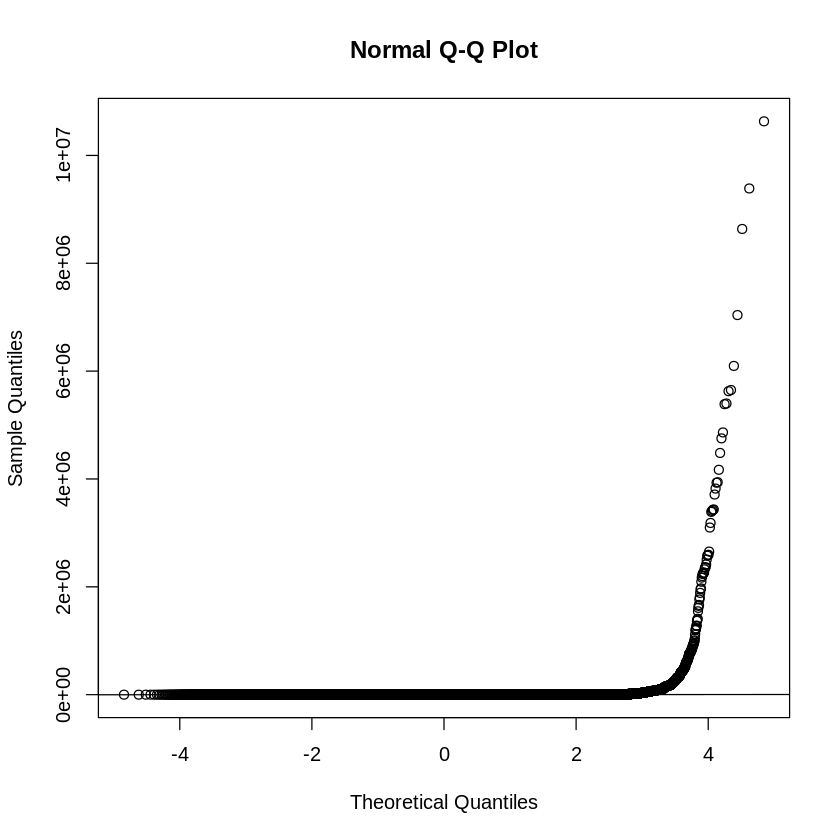

In [28]:
qqnorm(all_trips_v2$ride_length)
qqline(all_trips_v2$ride_length)

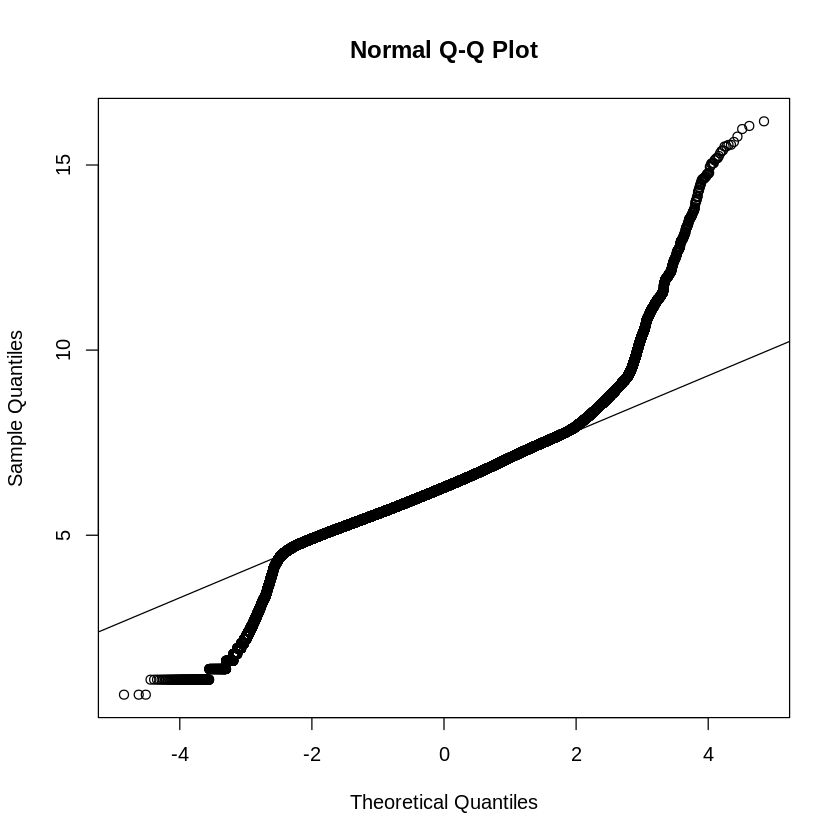

In [29]:
# Log_transformation of ride length and plotting Q-Q plot

all_trips_v2$log_ride_length <- log(all_trips_v2$ride_length + 1)
qqnorm(all_trips_v2$log_ride_length)
qqline(all_trips_v2$log_ride_length)


Above plots show that there are many outliers present in the data frame which might affect our interpretations. So they need to be removed.

Here we are using Quartile method for removing outliers from lower and upper bound of distribution:

In [30]:
Q1 <- quantile(all_trips_v2$ride_length, 0.25)
Q3 <- quantile(all_trips_v2$ride_length, 0.75)
IQR_value <- IQR(all_trips_v2$ride_length)
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value
outliers <- all_trips_v2[all_trips_v2$ride_length < lower_bound |
   all_trips_v2$ride_length > upper_bound, ]
dim(outliers)

[1] 54468    12

In [31]:
# Subset to keep only non-outlier observations
df_no_outliers <- all_trips_v2[all_trips_v2$ride_length >= lower_bound &
                                   all_trips_v2$ride_length <= upper_bound, ]

# Check dimensions
dim(df_no_outliers)

[1] 733722     12

Again plotting Q-Q norm, to check the effect of removed outliers:

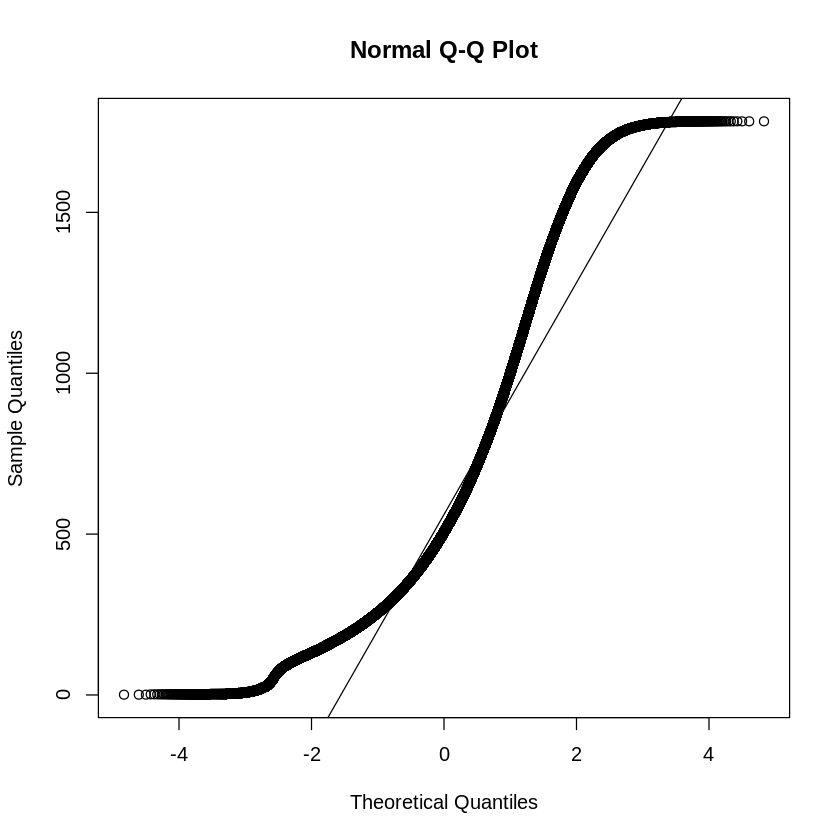

In [32]:
qqnorm(df_no_outliers$ride_length)
qqline(df_no_outliers$ride_length)

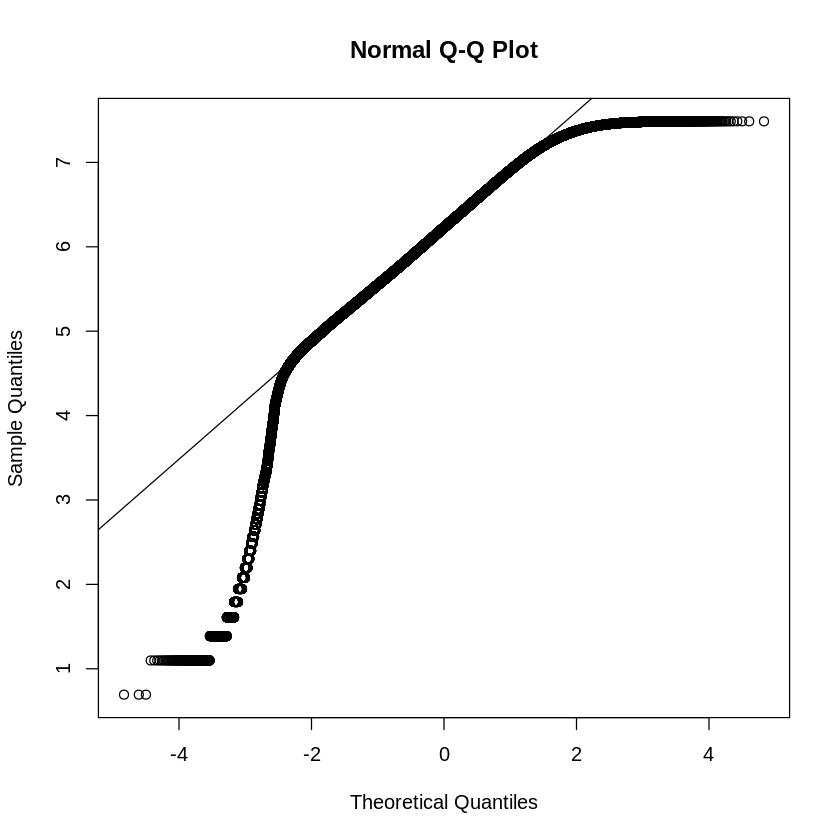

In [33]:
qqnorm(df_no_outliers$log_ride_length)
qqline(df_no_outliers$log_ride_length)

In [34]:
dim(df_no_outliers)

[1] 733722     12

In [35]:
write.csv(df_no_outliers, "clean_data.csv", row.names = FALSE)


This shows that although a lot of outliers are removed but still the data is not evenly spread accross the observations.

So before making any conclusions or observations we must be extreamly causious of this fact.


# Discriptive Analysis

Here we will do a basic discreptive analysis of out final and somewhat cleaned data.

In [36]:
clean_data <- df_no_outliers

In [37]:
# Ride Length
summary(clean_data$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   318.0   506.0   606.9   804.0  1783.0 

In [38]:
# Members Vs Casual
agg_results <- aggregate(data = clean_data, ride_length ~ member_casual,
FUN = function(x) c(mean = mean(x),
                    median = median(x),
                    std_deviation = sd(x),
                    variance = var(x),
                    max = max(x),
                    min = min(x)))

In [39]:
# Convert ride_length to a data frame
ride_length_df <- as.data.frame(agg_results$ride_length)

# Create result_df using the converted data frame
result_df <- data.frame(
  member_casual = agg_results$member_casual,
  ride_length_df
)
result_df

member_casual,mean,median,std_deviation,variance,max,min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,962.2180,942,446.4468,199314.8,1783,2
member,584.4895,489,364.6772,132989.5,1783,1


This shows that the average `ride_length` of `members` is less than that of `casual` users. At the same time the `ride_length` of `casual` members tend to varry more than the members on an average.

Their minimum and maximum is almost same.

In [40]:
# Average ride time by each day
aggregate(clean_data, ride_length ~ member_casual + day_of_week, FUN = mean)

member_casual,day_of_week,ride_length
<chr>,<chr>,<dbl>
casual,Friday,909.4072
member,Friday,571.6020
casual,Monday,906.6419
member,Monday,580.3203
casual,Saturday,1003.4015
member,Saturday,599.1841
casual,Sunday,1041.3895
member,Sunday,617.8128
casual,Thursday,913.0723


Notice the `day_of_week` are out of order(are in alphabetical order), let's make them in order:

In [41]:
clean_data$day_of_week<- ordered(clean_data$day_of_week,
          levels= c("Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday"))

In [42]:
aggregate(clean_data, ride_length ~ member_casual + day_of_week, FUN = mean)

member_casual,day_of_week,ride_length
<chr>,<ord>,<dbl>
casual,Sunday,1041.3895
member,Sunday,617.8128
casual,Monday,906.6419
member,Monday,580.3203
casual,Tuesday,897.7226
member,Tuesday,585.2204
casual,Wednesday,943.8090
member,Wednesday,582.1343
casual,Thursday,913.0723


In [43]:
# Analyze ridership data by weekday
analysis<- clean_data %>%
  mutate(weekday = wday(started_at, label= TRUE)) %>%    # Create weekday field
  group_by(member_casual, weekday) %>%                   # Group by user type and weekday
  summarise(number_of_rides= n(),
            average_duration = mean(ride_length)) %>%    # Provide data for no. of rides and average duration
  arrange(member_casual, weekday)                        # Sort

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


In [44]:
analysis

member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,10605,1041.3895
casual,Mon,3988,906.6419
casual,Tue,5115,897.7226
casual,Wed,4833,943.8090
casual,Thu,5004,913.0723
casual,Fri,5601,909.4072
casual,Sat,8319,1003.4015
member,Sun,55921,617.8128
member,Mon,106434,580.3203


In [45]:
write.csv(analysis, file = "number_of_riders.csv")       # Exporting as csv

# Visualization

Let's visualize the above results to get more clearity of the distribution.

In [46]:
library(scales)   # Needed for comma formatting of numbers

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


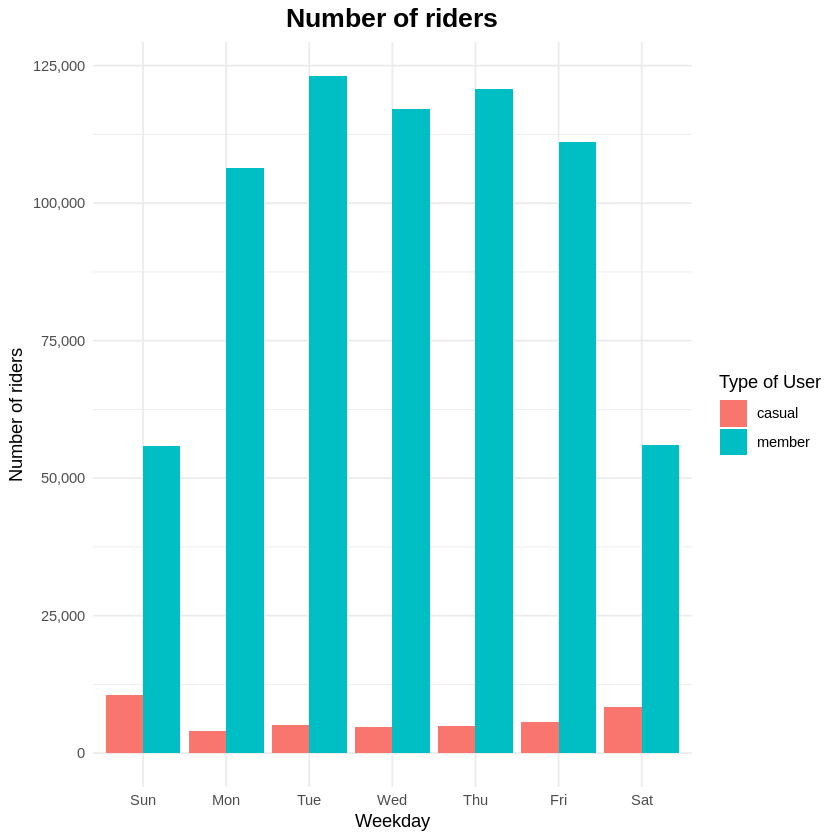

In [47]:
# No. of rides by rider type
clean_data %>%
  mutate(weekday= wday(started_at, label= TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides= n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  theme_minimal() +
  labs(title = "Number of riders",
       x = "Weekday",
       y = "Number of riders",
       fill = "Type of User")+
  scale_y_continuous(labels = comma) +    # Comma formatting of y axis
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

This shows that the the `number_of_rides` by members are always more than the casual users.

Comparing the `daya_of_week`, the members tend to do more rides in weekdays, particularly the middle of week, i.e. Tuesday-Thursday. Where as the casual users are doing more rides during weekends.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


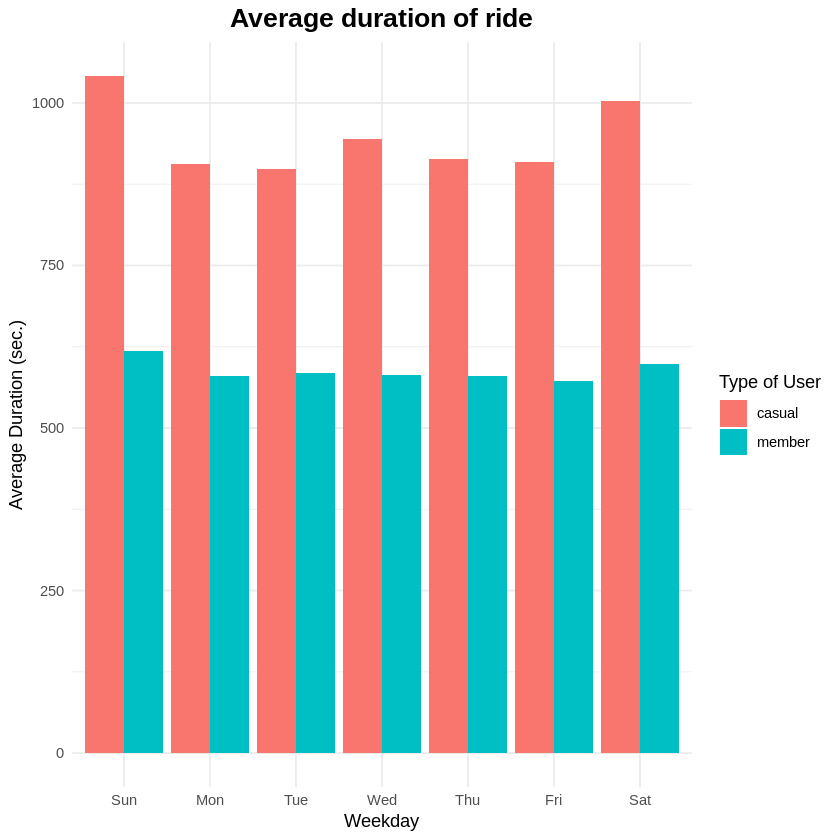

In [48]:
# Average Duration
clean_data %>%
  mutate(weekday= wday(started_at, label= TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides= n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average duration of ride",
       x = "Weekday",
       y= "Average Duration (sec.)",
       fill = "Type of User") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

As also mentioned earlier, this graph shows that the casual users are having more `average_duration_of_rides` as compared the members.

In [49]:
# Export summary file for further analysis

count<- aggregate(clean_data, ride_length ~ member_casual + day_of_week,
FUN = mean)
write.csv(count, file = "average_ride_length.csv")

# Inferentital Analysis

Here we will try to do some Inferential Analysis of the data based on three major lines, i.e. `ride_length`, `member_casual` and `day_of_week`.

We will do some basic **Linear Regression** and try to find out which Variable (i.e. `member_casual` and/or `day_of_week`) is important and if it is, how much will it be able to predict the future `ride_length`.

In [50]:
options(scipen = 999)  # Prevents from displaying values in exponential form

First we will convert these categorical variables (i.e. `member_casual` and/or `day_of_week`)into **Dummy Variables** making regression analysis simple and doable.

In [51]:
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
df_dummies <- dummy_cols(
    clean_data, select_columns = c("member_casual", "day_of_week"),
remove_first_dummy = TRUE)
head(df_dummies)

,started_at,ended_at,start_station_name,end_station_name,member_casual,Date,month,day,year,day_of_week,ride_length,log_ride_length,member_casual_member,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
,<dttm>,<dttm>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<ord>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2019-01-01 00:04:37,2019-01-01 00:11:07,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,member,2019-01-01,01,01,19,Tuesday,390,5.968708,1,0,1,0,0,0,0
2,2019-01-01 00:08:13,2019-01-01 00:15:34,State St & Randolph St,Dearborn St & Van Buren St (*),member,2019-01-01,01,01,19,Tuesday,441,6.091310,1,0,1,0,0,0,0
3,2019-01-01 00:13:23,2019-01-01 00:27:12,Racine Ave & 18th St,Western Ave & Fillmore St (*),member,2019-01-01,01,01,19,Tuesday,829,6.721426,1,0,1,0,0,0,0
4,2019-01-01 00:13:45,2019-01-01 00:43:28,California Ave & Milwaukee Ave,Clark St & Elm St,member,2019-01-01,01,01,19,Tuesday,1783,7.486613,1,0,1,0,0,0,0
5,2019-01-01 00:14:52,2019-01-01 00:20:56,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,2019-01-01,01,01,19,Tuesday,364,5.899897,1,0,1,0,0,0,0
6,2019-01-01 00:15:33,2019-01-01 00:19:09,LaSalle St & Washington St,Dearborn St & Monroe St,member,2019-01-01,01,01,19,Tuesday,216,5.379897,1,0,1,0,0,0,0


In [53]:
# Renaming Dummies
df_dummies <- rename(df_dummies,
                    D1 = member_casual_member,
                    D_mon = day_of_week_Monday,
                    D_tue = day_of_week_Tuesday,
                    D_wed = day_of_week_Wednesday,
                    D_thur = day_of_week_Thursday,
                    D_fri = day_of_week_Friday,
                    D_sat = day_of_week_Saturday)
colnames(df_dummies)

[1] "started_at"         "ended_at"           "start_station_name"
 [4] "end_station_name"   "member_casual"      "Date"              
 [7] "month"              "day"                "year"              
[10] "day_of_week"        "ride_length"        "log_ride_length"   
[13] "D1"                 "D_mon"              "D_tue"             
[16] "D_wed"              "D_thur"             "D_fri"             
[19] "D_sat"

In [54]:
df_dummies <- df_dummies %>%
  select(-c(started_at, ended_at, start_station_name, end_station_name))
head(df_dummies)

,member_casual,Date,month,day,year,day_of_week,ride_length,log_ride_length,D1,D_mon,D_tue,D_wed,D_thur,D_fri,D_sat
,<chr>,<date>,<chr>,<chr>,<chr>,<ord>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,member,2019-01-01,01,01,19,Tuesday,390,5.968708,1,0,1,0,0,0,0
2,member,2019-01-01,01,01,19,Tuesday,441,6.091310,1,0,1,0,0,0,0
3,member,2019-01-01,01,01,19,Tuesday,829,6.721426,1,0,1,0,0,0,0
4,member,2019-01-01,01,01,19,Tuesday,1783,7.486613,1,0,1,0,0,0,0
5,member,2019-01-01,01,01,19,Tuesday,364,5.899897,1,0,1,0,0,0,0
6,member,2019-01-01,01,01,19,Tuesday,216,5.379897,1,0,1,0,0,0,0


We will first define simple **ANOVA model** in which Dependent Variable is `ride_length` and the Independent Variable is `D1` i.e. member typer, either casual or member.

In [55]:
# ANOVA Model 1(with member type)
model_member <- lm(data = df_dummies, ride_length ~ D1)
summary(model_member)


Call:
lm(formula = ride_length ~ D1, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-960.22 -276.49  -92.49  194.51 1198.51 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  962.218      1.775   542.1 <0.0000000000000002 ***
D1          -377.728      1.830  -206.4 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 370 on 733720 degrees of freedom
Multiple R-squared:  0.05489,	Adjusted R-squared:  0.05489 
F-statistic: 4.261e+04 on 1 and 733720 DF,  p-value: < 0.00000000000000022


This shows that the Variable D1 is highly singnificant and has a negative relation with the independent variable. This means that with one unit increae in `D1` the `ride_length` decreases by aproximately 378 units.

We know that `D1` is 1 when member and is 0 when casual, thus it shows that the difference between the ride length of member and casual user type is aproximately 378 seconds, where casual users are having more ride length.

At the same time the R\^2 is too low i.e. around 5%, showing that the model is not reliable as it does not effectivly define the causality of the Dependent variable.

Now we will try another ANOVA model where the Dependent Variable is same, `ride_length` and Independent variables are dummies for `day_of_week` category and we'll check how well are they defining the causality of dependent variable.

In [56]:
# ANOVA Model (day of week)
model_day <- lm(data = df_dummies, ride_length ~ D_mon + D_tue +
  D_wed + D_thur + D_fri + D_sat)
summary(model_day)


Call:
lm(formula = ride_length ~ D_mon + D_tue + D_wed + D_thur + D_fri + 
    D_sat, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-683.34 -287.11  -98.82  197.53 1195.18 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  685.336      1.471  465.85 <0.0000000000000002 ***
D_mon        -93.230      1.862  -50.06 <0.0000000000000002 ***
D_tue        -87.650      1.813  -48.34 <0.0000000000000002 ***
D_wed        -88.869      1.829  -48.59 <0.0000000000000002 ***
D_thur       -92.738      1.819  -50.97 <0.0000000000000002 ***
D_fri        -97.511      1.844  -52.89 <0.0000000000000002 ***
D_sat        -33.833      2.099  -16.12 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 379.4 on 733715 degrees of freedom
Multiple R-squared:  0.006149,	Adjusted R-squared:  0.006141 
F-statistic: 756.6 on 6 and 733715 DF,  p-value: < 0.00000000000000022


This also shows that the Variables `D_mon`, `D_tue`, `D_wed`, `D_thur`, `D_fri` and`D_sat` are highly singnificant and are having a negative relation with the independent variable.

We know that these dummies are for respective day of week and is 1 when it is that day and is 0 otherwise i.e. any other day.

Here also the R\^2 is too low i.e. around 0.6%, showing that the model is not reliable as it does not effectivly define the causality of the Dependent variable.

Now, let's define another model with both categories i.e. `member_casual` and `day_of_week`, and check their significance.

In [57]:
# ANOVA Model (member & day of week)
model_member_day <- lm(data = df_dummies, ride_length ~ D1 + D_mon + D_tue +
  D_wed + D_thur + D_fri + D_sat)
summary(model_member_day)


Call:
lm(formula = ride_length ~ D1 + D_mon + D_tue + D_wed + D_thur + 
    D_fri + D_sat, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-991.04 -276.84  -91.97  195.02 1212.81 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  994.039      2.118  469.22 <0.0000000000000002 ***
D1          -367.247      1.856 -197.90 <0.0000000000000002 ***
D_mon        -47.950      1.829  -26.22 <0.0000000000000002 ***
D_tue        -43.756      1.780  -24.58 <0.0000000000000002 ***
D_wed        -44.879      1.796  -24.99 <0.0000000000000002 ***
D_thur       -48.817      1.786  -27.33 <0.0000000000000002 ***
D_fri        -56.604      1.808  -31.31 <0.0000000000000002 ***
D_sat        -22.823      2.046  -11.16 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 369.7 on 733714 degrees of freedom
Multiple R-squared:  0.05651,	Adjusted R-squared:  0.0565 
F-statistic:  627

This too shows that these variables are highly significant and have a negatve relation with the dependent variable i.e. `ride_length`.

Here also the R\^2 is too low, showing that the model is not well specified and does not tell much about the causality of the `ride_length`.

According to the data avalabe with us, that's all inference we can get about the `ride_length`. To get a better picture we need more data on other categories or variables that can make model correctly specified.

OR we can try other models for inferences.

Let's try the **Robust Linear Regression (rlm)**, where `ride_length` is the dependent variable, and the independent variables are `D1`, `D_mon`, `D_tue`, `D_wed`, `D_thur`, `D_fri`, and `D_sat`.

 As we have observed that there are many extream values in the data, to address that we have used the Robust Linear regression model as it is less sensitive to the extream values.

In [58]:
library(MASS)
robust_model <- rlm(data = df_dummies, ride_length ~ D1 + D_mon + D_tue +
  D_wed + D_thur + D_fri + D_sat)
summary(robust_model)


Call: rlm(formula = ride_length ~ D1 + D_mon + D_tue + D_wed + D_thur + 
    D_fri + D_sat, data = df_dummies)
Residuals:
    Min      1Q  Median      3Q     Max 
-976.78 -239.00  -54.24  231.81 1249.81 

Coefficients:
            Value     Std. Error t value  
(Intercept)  979.7766    1.9472   503.1633
D1          -398.3194    1.7057  -233.5169
D_mon        -40.5861    1.6810   -24.1434
D_tue        -36.4574    1.6364   -22.2784
D_wed        -37.2216    1.6506   -22.5505
D_thur       -40.7503    1.6421   -24.8166
D_fri        -48.2692    1.6620   -29.0436
D_sat        -20.7560    1.8802   -11.0392

Residual standard error: 351.2 on 733714 degrees of freedom

This shows that, all coefficients have very high absolute t-values, indicating they are statistically significant. This suggests that all variables included in the model have a meaningful effect on ride length.

**Residual Standard Error (RSE)** is 351.2, this represents the typical deviation of the actual ride length from the predicted values. Usually a lower RSE is desirable, as it indicates better model accuracy.

In [59]:
# exporting data for future analysis
write.csv(df_dummies, "df_dummies.csv", row.names = FALSE)

# Future Actions

1. **Feature Engineering & Additional Variables:**

* Include more predictors like weather conditions, time of day, user demographics (if available), and trip purpose.
* Interaction terms (e.g., User typer × Days of the Week) could help capture variations across user types.


2. **Checking for Multicollinearity:**

* Use **Variance Inflation Factor (VIF)** to check if some independent variables are too correlated, which could distort coefficients.


3. **Alternative Models for Better Predictions:**

* Random Forest or Gradient Boosting (XGBoost, LightGBM) could provide better predictions if non-linearity is present.
* Generalized Additive Models (GAMs) allow for more flexibility in capturing trends.


4. **Improving Model Fit:**

* Since RSE is 351.2, further reducing errors would be ideal.
Exploring heteroscedasticity (varying error variance) and adjusting the model accordingly (Weighted Least Squares, Quantile Regression) may help.


5. **Cross-Validation & Outlier Analysis:**

* Use cross-validation to ensure the model generalizes well.
Investigate residuals to detect outliers or influential observations that might be skewing results.

**Author:** Utkarsh Bhardwaj</br>
**Publishing Date:** 24th Feburary, 2025</br>
[LinkedIn](https://www.linkedin.com/in/utkarsh284/) | </br>
[GitHub](https://github.com/utkarsh-284) | </br>
[Kaggle](https://www.kaggle.com/utkarsh284)